<a href="https://colab.research.google.com/github/mrinconp/Estad-stica-I-y-II/blob/master/An%C3%A1lisis_descriptivo_de_estad%C3%ADsticas_vitales_en_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

El presente trabajo es un análisis descriptivo de algunas de las variables estadísticas recopiladas por el DANE en el año 2020 en el marco de Estadísticas Vitales, a través de la Coordinación de Demografía. Mediante el uso del lenguaje Python se obtienen gráficos, medidas descriptivas e índices de correlación que permiten analizar las variables "Número de embarazos, incluyendo el presente" y "Edad del padre de un recién nacido".

El objetivo de este análisis es discutir los resultados obtenidos para determinar las características de la distribución y el grado de correlación entre las variables mencionadas. Además, se consideran otras variables disponibles en el archivo del DANE buscando identificar posibles interacciones y factores de causalidad que puedan estar presentes. Este enfoque no solo proporciona una visión de la relación entre la edad del padre y el número de embarazos de la mujer, sino que también ofrece un contexto más amplio para entender cómo otras variables sociodemográficas influyen en las estadísticas vitales en Colombia.

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro, skew, kurtosis, spearmanr, kendalltau, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Medidas descriptivas para la variable "Edad del padre"



In [ ]:
file_path = "/content/Recursos/nac2020.csv"
tabla = pd.read_csv(file_path, sep = ",", index_col=0, encoding='latin-1') #Se leen todos los datos
df = tabla[['EDAD_PADRE','N_EMB']] #Se toman únicamente las columnas de interés
df.head(3)

,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1


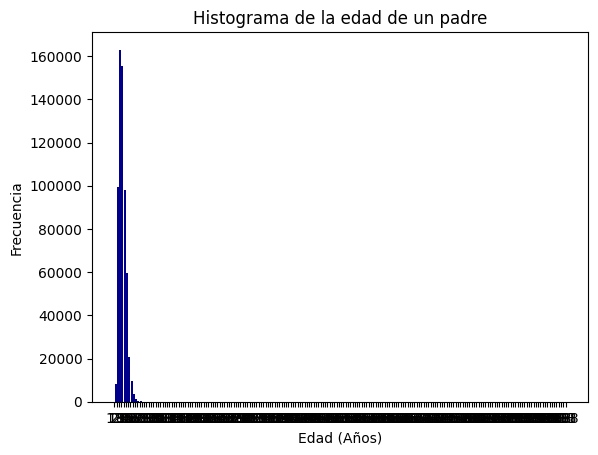

In [ ]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE)+1, 5)
plt.hist(df.EDAD_PADRE, bins=intervalos, color = 'darkblue', rwidth = 0.85)
plt.title('Histograma de la edad de un padre')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

In [ ]:
df1 = df[(df.EDAD_PADRE < 120) & (df.N_EMB != 99)] #No considerar valores sin información
df1.head(3)

,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1


<ipython-input-11-3a42b694de54>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label= "Distribución normal", color= 'darkblue')


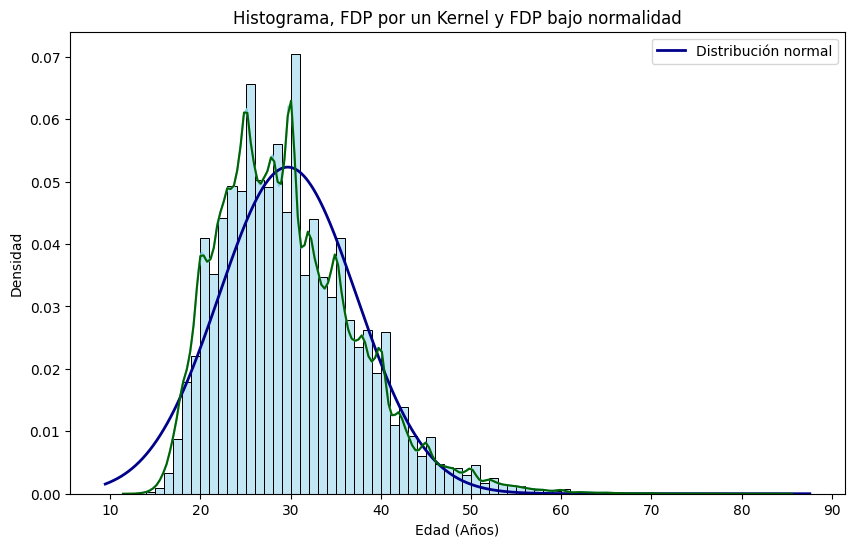

In [ ]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE)+1)
plt.figure(figsize=(10,6))
sns.histplot(df1.EDAD_PADRE, bins=intervalos1, kde= True, stat= 'density', color = 'skyblue', edgecolor= 'black') #kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernel

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE)) #probability density function
plt.plot(x, p, 'k', linewidth=2, label= "Distribución normal", color= 'darkblue')
sns.kdeplot(df1.EDAD_PADRE, color= 'darkgreen')

plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad')
plt.xlabel('Edad (Años)')
plt.ylabel('Densidad')

plt.legend()
plt.show()


Sea $Y:=$ Edad del padre de un recién nacido en Colombia

Descriptivamente, como la función de densidad de probabilidad de los datos estimada por un método Kernel (línea cyan) no coincide con la función de densidad de probabilidad asumiendo el supuesto de normalidad (línea azul), $Y\sim \text{Normal} (\text{Media} =\bar x, \text{Varianza} = S^2_x)$ Entonces no asumimos normalidad

In [ ]:
shapiro(df1.EDAD_PADRE)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9589075446128845, pvalue=0.0)

En nuestro caso particular, tenemos que pvalue = 0.0 < 0.05 , es decir, se rechaza que la variable de la edad de un padre de un recién nacido en Colombia presenta distribución normal

In [ ]:
idx = np.random.randint(len(df1.EDAD_PADRE), size=100)
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=0.8977171182632446, pvalue=1.1059439657401526e-06)

Como el valor $p < 0.05$, entonces se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal para una muestra de 100.

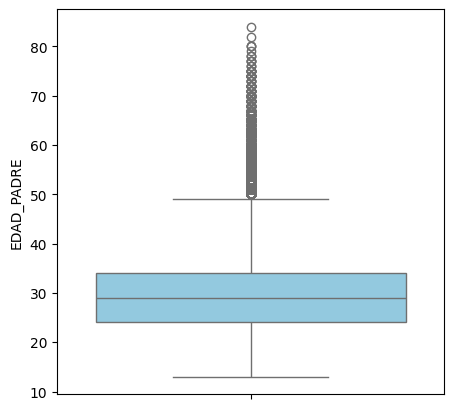

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df1.EDAD_PADRE, color = 'skyblue', saturation = 0.75)
plt.show()

Se considera que la edad de un padre de un recién nacido en Colombia es atípica si es mayor que 50 años. El primer cuartil es aproximandamente 25 años, la media aritmética es aproximandamente 29 años y el tercer cuartil es aproximadamente 35 años.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} = 35-25 = 10$

In [ ]:
muestra = 100000 # Graficar una muestra de los datos (cambiar según la capacidad de memoria)
df1_muestra = df1.sample(n=muestra, random_state=1)

# Plot the sampled data
plt.figure(figsize=(5,5))
fig = px.strip(df1_muestra, x='EDAD_PADRE', orientation='h')
fig.show()

<Figure size 500x500 with 0 Axes>

De acuerdo con el diagrama de puntos, se observa una alta variabilidad de la edad de un padre de un recién nacido en Colombia

In [ ]:
print(f"Media: {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza: {np.var(df1.EDAD_PADRE)} y la desviación estándar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría: {skew((df1.EDAD_PADRE))}")
print(f"Curtosis: {kurtosis(df1.EDAD_PADRE)}")



*   Aproximadamente el promedio de la edad de un padre de un recién nacido en Colombia, es de 29.7 años.
*   Aproximadamente la distancia entre los valores de la edad de un padre de un recién nacido en Colombia y la media es de 7.62 años
*   La distribución de la edad de un padre de un recién nacido en Colombia tiene asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
*   La distribución es leptocurtica, es decir, hay una baja concentración de las edades de un padre de un recién nacido en Colombia con respecto a la media.



# Medidas descriptivas para la variable "Número de embarazos incluyendo el presente"

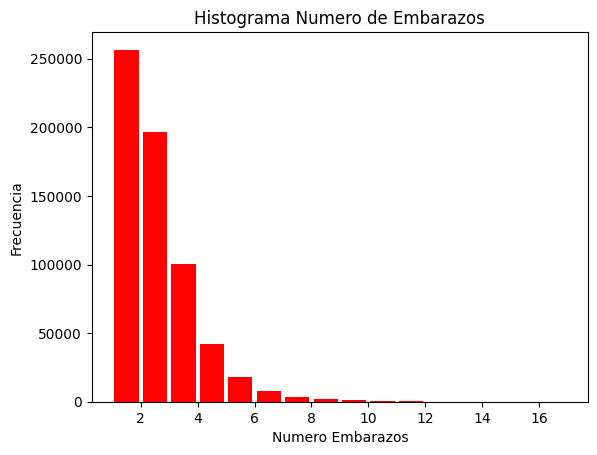

In [ ]:
intervalo = range(min(df1.N_EMB), max(df1.N_EMB)+1, 1) #Histograma de la variable aleatoria "X".
plt.hist(df.N_EMB, bins = intervalo, color = 'red', rwidth = 0.85)
plt.title('Histograma Numero de Embarazos')
plt.xlabel("Numero Embarazos")
plt.ylabel('Frecuencia')
plt.show()

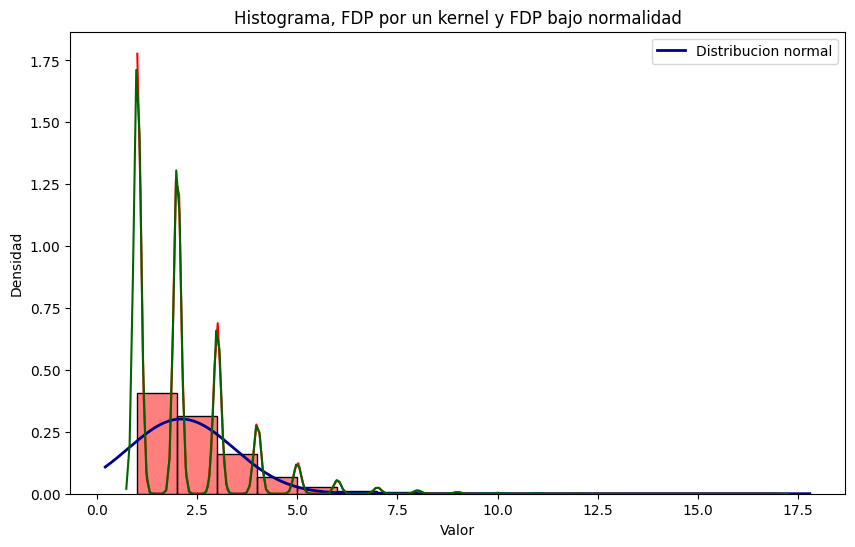

In [ ]:
intervalo1 = range(min(df1.N_EMB), max(df1.N_EMB)+1) #Histograma de la variable aleatoria "X", FDP por método Kernel y FDP asumiendo normalidad.
plt.figure(figsize = (10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalo1, kde = True, stat = 'density', color = 'red', edgecolor = 'black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))

plt.plot(x, p , linewidth = 2, label = 'Distribucion normal', color = 'darkblue')
sns.kdeplot(x = df1.N_EMB, color = 'darkgreen')

plt.title("Histograma, FDP por un kernel y FDP bajo normalidad")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()

plt.show()

Sea $X:=$ " Numero de Embarazos, incluido el presente en Colombia"

Dando que la función de densidad de probabilidad (FDP) de los datos estimada por un método Kernel (línea Verde) no coincide con la FDP de la variable aleatoria asumiendo el supuesto de normalidad (línea azul), $X\sim \text{Normal} (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, no podemos asumir normalidad de la variable aleatoria $X$.

In [ ]:
shapiro(df1.N_EMB) #Prueba Shapiro, prueba de hipotesis.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7731585502624512, pvalue=0.0)

Para hacer la prueba de hipotesis tomando en cuenta la siguiente información:

*   Si el **valor p** en una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

En nuestra variable aleatoria observamos que $pvalue=0.0 < 0.05$ luego se rechaza que la variable aleatoria $Y$ presente una distribución normal.

In [ ]:
df1.N_EMB.count() #Cuenta el numero de datos.

629394

In [ ]:
idx = np.random.randint(len(df1.N_EMB), size = 100) #Muestra de nuestro conjunto de datos tomada aleatoriamente de tamaño 100.
idx #Muestra aleatoria
shapiro(df1.N_EMB.index[idx]) #Prueba de shapiro a los elementos de nuestra muestra.

ShapiroResult(statistic=0.8638451099395752, pvalue=3.989532615378266e-08)

Note que $pvalue$ sigue siendo menor a $0.05$, luego se sigue rechazando la normalidad de nuestra variable en esa muestra.

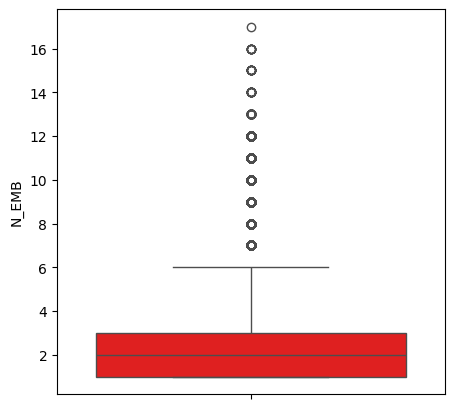

In [ ]:
plt.figure(figsize = (5, 5)) # Margenes de la figura.
sns.boxplot(df1.N_EMB, color = 'red', saturation = 0.75) # Diagrama de Cajas y Bigotes de la variable aleatoria "X".
plt.show()

De el Diagrama de Cajas y Bigotes se concluye:
* Se considera atípico en colombia que una madre haya tenido más de 6 embarazos.
* $Primer$ $cuartil$ $\approx 1$ embarazo.
* $Tecer$ $cuartil$ $\approx 3$ embarazos.
* $Media$ $Aritmética$ $\approx 2$ embarazos.
* $\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} = 3 - 1 = 2$ embarazos.

In [ ]:
muestra = 100000 # Graficar una muestra de los datos (cambiar según la capacidad de memoria)
df1_muestra = df1.sample(n=muestra, random_state=1)

# Diagrama de puntos
plt.figure(figsize=(5,5))
fig = px.strip(df1_muestra, x= 'N_EMB' , orientation='h')
fig.show()

<Figure size 500x500 with 0 Axes>

De acuerdo con el diagrama de puntos, se observa una alta variabilidad del numero de embarazos en Colombia

In [ ]:
print(f"Media {np.mean(df1.N_EMB)}") #Media Aritmética.
print(f"Varianza {np.var(df1.N_EMB)} y la desviación estandar es de {np.std(df1.N_EMB)}") #Varianza y Desviación Estandar.
print(f"Asimetría {skew(df1.N_EMB)}") # Asimetría
print(f"Curtosis {np.mean(df1.N_EMB)}") #Curtosis

Media 2.0952630625649435
Varianza 1.7473732150206889 y la desviación estandar es de 1.3218824512870608
Asimetría 1.9291441901656332
Curtosis 2.0952630625649435


*   Aproximadamente el promedio de embarazos de una madre en Colombia es de 2.1 embarazos.
*   Aproximadamente la distancia entre los valores del nuemero de embarazos de una madre y la media es de 1.32 embarazos.
*   La distribución del numero de embarazos en Colombia es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
*   La distribución es platicúrtica, es decir, hay una baja concentración de los embarazos de una madre en Colombia con respecto a la media.

# Análisis de correlación


Se realiza un modelo de regresión lineal a partir de los datos de las variables $X:= \text{Número de embarazos incluido el presente}$ y $Y:= \text{Edad del padre (Años)}$.

In [ ]:
modelo = LinearRegression()
# (df1.N_HIJOSV, df1.EDAD_PADRE) es equivalente a (df1["N_HIJOSV"], df1["EDAD_PADRE"])
modelo.fit(np.array(df1.N_EMB).reshape(-1,1) , np.array(df1.EDAD_PADRE).reshape(-1,1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1,1))

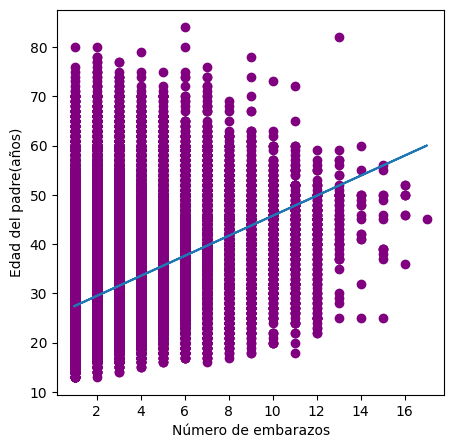

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color= 'purple',marker="o")
plt.plot(df1.N_EMB, predi_lineal, linestyle = '-')
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre(años)')
plt.show()

Apartir del diagrama de dispersión se observa que el número de embarazos se reduce a medida que aumenta la edad del padre; sin embargo, este resultado no es consistente con la recta de dispersión. Esto último se puede atribuir a presencia de datos no representativos en la muestra.

Así, se plantean las hipótesis:
* Hipótesis estadística: Las variables $X$, y $Y$ están correlacionadas.
* Hipótesis nula: No hay correlación entre las variables $X$ y $Y$

Para verificar las hipótesis se realizan los test de correlación de Pearson, Spearman y Kendall inicialmente para todos los datos, y seguido, para los datos representativos únicamente.

## Test de correlación para la totalidad de los datos

In [ ]:
coef_pearson = pearsonr(df1.N_EMB, df1.EDAD_PADRE)
coef_spearman = spearmanr(df1.N_EMB, df1.EDAD_PADRE)
coef_kendall = kendalltau(df1.N_EMB, df1.EDAD_PADRE)

print({coef_pearson}, {coef_spearman}, {coef_kendall})

{PearsonRResult(statistic=0.3529592050718215, pvalue=0.0)} {SignificanceResult(statistic=0.37986095843137474, pvalue=0.0)} {SignificanceResult(statistic=0.29686900304306135, pvalue=0.0)}


Como $p < 0.05$ en cada uno de los test, entonces se rechaza la hipótesis nula con una confianza de 95%. Así, las variables $X$ y $Y$ están correlacionadas. Además, como $0.2<\vert \rho (X,Y) \vert < 0.4, 0.2 < \vert \eta (X,Y) \vert < 0.4, 0.2 < \vert \kappa (X,Y) \vert < 0.4$ entonces se determina que las variables están discretamente correlacionadas.

## Test de correlación para datos representativos

A partir del diagrama de cajas y bigotes de las variables $X:= \text{Número de embarazos incluyendo el presente}$ y $Y:= \text{Edad del padre (Años)}$, se determina que los valores representativos para el número de embarazos son menores o iguales a 6, y que los valores representativos para la Edad de un padre en años son menores o iguales a 50.

In [ ]:
df2 = df[(df.EDAD_PADRE <= 50) & (df.N_EMB <= 6)] #Se redefine el conjunto de datos para tomar únicamente los representativos.

In [ ]:
modelo = LinearRegression()
modelo.fit(np.array(df2.N_EMB).reshape(-1,1) , np.array(df2.EDAD_PADRE).reshape(-1,1))
predi_lineal = modelo.predict(np.array(df2.N_EMB).reshape(-1,1))

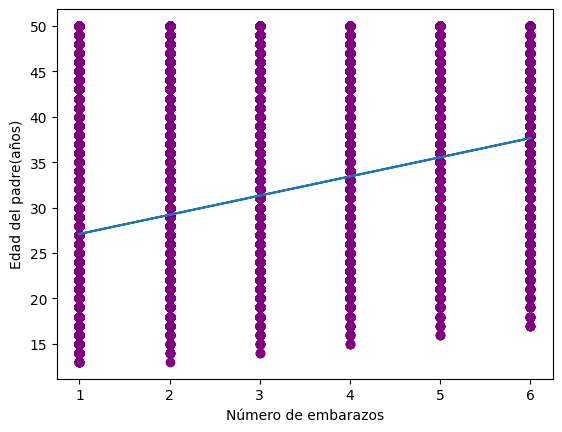

In [ ]:
plt.scatter(df2["N_EMB"], df2["EDAD_PADRE"], color= 'purple',marker="o")
plt.plot(df2.N_EMB, predi_lineal, linestyle = '-')
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre(años)')
plt.show()

Al realizar el modelo de regresión lineal y el gráfico de dispersión se observa una dispersión casi uniforme, donde a partir de los 3 hijos el valor mínimo de la edad del padre empieza a aumentar. Esta última observación coincide con la recta de regresión, pues a medida que aumenta el número de embarazos, es de esperar que la edad del padre sea también mayor.

In [ ]:
coef_pearson = pearsonr(df2.N_HIJOSV, df2.EDAD_PADRE)
coef_spearman = spearmanr(df2.N_HIJOSV, df2.EDAD_PADRE)
coef_kendall = kendalltau(df2.N_HIJOSV, df2.EDAD_PADRE)

print({coef_pearson}, {coef_spearman}, {coef_kendall})

{PearsonRResult(statistic=0.31477531942826253, pvalue=0.0)} {SignificanceResult(statistic=0.3510476888594315, pvalue=0.0)} {SignificanceResult(statistic=0.2771508443950992, pvalue=0.0)}


De manera análoga, al realizar los test de Pearson, Spearman y Kendall para las variables considerando únicamente los datos representativos, como $p < 0.05$ se rechaza la hipótesis nula y como $0.2 < \vert \rho \vert, \vert \eta \vert, \vert \kappa \vert < 0.4$ se establece que las variables están discretamente relacionadas.

# Discusión de resultados
Inicialmente se realizó un análisis comparativo a partir de histogramas y funciones de probabilidad (estimación por método kernel y asumiendo normalidad) para las variables "Edad del padre de un recién nacido" y "Número de embarazos incluyendo el presente".

Respecto a la variable "Edad del padre de un recién nacido", se observó que al realizar una comparación de las gráficas de la función de probabilidad de los datos estimada usando un método kernel y la función de densidad de probabilidad asumiendo normalidad estas dos no coinciden, por tanto no se asumió normalidad en la variable. De igual manera al realizar la prueba de Shapiro se obtuvo que el valor $p \approx 0$, motivo por el cual se rechazó la hipótesis nula de que la variable tenga distribución normal.

Al realizar el histograma se apreció que la moda es de 30 años y a partir de este valor se evidencia una tendencia a la baja. En el diagrama de cajas y bigotes se observó que la edad de un padre de un recién nacido se considera atípica después de los 50 años. El diagrama de puntos indica una alta variabilidad para la edad del padre de un recién nacido.
Adicionalmente, debido a que el coeficiente de simetría es mayor a 0 la variable presenta simetría positiva y de igual manera ya que la curtosis es mayor a 0 la variable presenta una distribución leptocurtica.

Para la variable aleatoria "Número de embarazos incluyendo el presente", los resultados indicaron que la variable no sigue una distribución normal, lo cual fue corroborado mediante la prueba de Shapiro. Además, se obtuvieron los siguientes hallazgos: la variable aleatoria "Número de embarazos incluyendo el presente" muestra características de asimetría positiva y curtosis platicúrtica, lo que sugiere que no hay un valor de embarazo que sea extremadamente común. La media es de 2.1 embarazos y la desviación estándar es de 1.32, lo cual es relativamente alto en relación con la media, sugiriendo una variabilidad moderada en el número de embarazos. Las mujeres no tienen exactamente el mismo número de embarazos, y hay una diversidad significativa en la cantidad de embarazos. Estas características indican una variabilidad considerable y la presencia de valores atípicos hacia la derecha, lo cual sugiere que, aunque la mayoría de las mujeres tienen un número relativamente bajo de embarazos, hay un grupo menor que tiene muchos más embarazos.

En cuanto a los resultados obtenidos sobre la correlación de las variables es de destacar el impacto de los datos no representativos pues a partir del diagrama y la recta de dispersión se obtuvo resultados opuestos en los valores más altos de ambas variables. Por esta razón, y sobre el rango de representatividad que se obtuvo del diagrama de cajas y bigotes de cada variable, se realizó el diagrama y recta de dispersión para obtener en este caso resultados concisos. Los test de correlación de Pearson, Spearman y Kendall sugieren una correlación discreta con un valor $ p \approx 0$ al tomar únicamente datos representativos y al tomar la totalidad de los datos.

Ahora bien, es preciso revisar la naturaleza de esta observación. Si bien se observó una correlación positiva, decir que un mayor número de embarazos implica una mayor edad del padre no es del todo cierto: aunque para el tercer, cuarto, quinto y sexto embarazo se tienen rangos respectivos de $[14,50], [15,50],[16,50],[17,50]$, para uno y dos embarazos se tiene que la edad del padre varía entre los 13 y 50 años, y de ahí el bajo grado de correlación.

Por último, dada la falta de coherencia al asumir que una variable depende de otra, se asume una independencia de las variables; sin embargo, este resultado se considera más como una conjetura y se requiere de un test de independencia para concretarlo.




# Conclusiones

Una vez obtenidos los resultados para las variables estadísticas "Número de embarazos incluyendo el presente" y "Edad del padre de un recién nacido", se determinan algunas conclusiones de carácter estadístico.

La variable $Y:= \text{Edad del padre de un recién nacido}$ en su totalidad no tiene distribución normal según los resultados obtenidos; sin embargo, hay algunas muestras de la variable en las que se presenta normalidad. Se observó una alta variabilidad, aunque al llegar a los 30 años las edades se repiten cada vez menos, indicando que a partir de esta edad, hay menos padres de recién nacidos en Colombia.

La mayoría de las muestras de la variable aleatoria "Número de embarazos incluyendo el presente" en Colombia no tendrán una distribución normal debido a la tendencia inherente de la variable a presentar asimetría positiva y curtosis platicúrtica.

La correlación discreta entre la edad del padre y el número de embarazos indica una relación lineal débil o nula entre estas variables; sin embargo, es posible que exista una relación no lineal que no se haya considerado. Además, dada la dispersión casi uniforme de los datos representativos, se puede conjeturar una posible independencia entre las variables, esto debido a que conocer la edad del padre no proporciona mucha información sobre el número de embarazos de la mujer y viceversa.

Es importante señalar que hay diversos factores externos que pueden influir en el número de embarazos de una mujer, como el nivel socioeconómico, la educación y el acceso a servicios de planificación familiar. Finalmente, se considera que la alta variabilidad en la edad del padre sugiere que otras variables, como el número de hijos nacidos vivos o la edad de la madre, podrían estar influyendo en el número de embarazos; es decir, si bien se encontró una baja correlación entre las variables estudiadas, el análisis entre el número de embarazos de una mujer y el número de hijos nacidos vivos podría resultar en una mayor correlación que resultaría de mayor interés para estudios posteriores.





# Bibliografía

*   Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://pdfs.semanticscholar.org/7e73/43a5608fff1c68c5259db0c77b9193f1546d.pdf)
*   Departamento Administrativo Nacional de Estadística - DANE (2020) Estadísticas vitales - EEVV - 2020. [Link](https://microdatos.dane.gov.co/index.php/catalog/732/study-description)
* Moore, D.S. (2007) The Basic Practice of Statistics. Sexta edición. Freeman, Nueva York.


